In [45]:
# importation of the packages

import numpy as np
from graph_tool.all import *
import random
import graph_tool.topology as gt
import graph_tool.clustering as gc
import graph_tool.centrality as gcent
import graph_tool.generation as gg

from itertools import chain

import matplotlib.pyplot as plt
import pickle
import matplotlib.colors as colors
import matplotlib
import copy
from matplotlib.lines import Line2D 

from scipy.stats.stats import pearsonr
import pandas as pd

%matplotlib inline
import seaborn as sns
from scipy.stats import gaussian_kde
from collections import Counter
import math
import scipy.stats
import collections
from itertools import combinations

import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import norm 
from sklearn.neighbors import KernelDensity 
from sklearn.utils.fixes import parse_version 

from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

from collections import Counter
#from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from multiprocessing import Pool
from  matplotlib.colors import LinearSegmentedColormap

from scipy.stats.stats import pearsonr 
from sklearn.pipeline import Pipeline
import scipy.stats as stats

import os
from scipy import stats
from scipy.optimize import curve_fit
from matplotlib import pyplot

from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.stats import norm

from scipy.stats import pearsonr

In [46]:
path_results = os.getcwd()[:-7]+'analysis/results'
path_results

'/mnt/sdb1/elsa/ML_6/github/analysis/results'

## A-Import of the data

### Activities

In [47]:
with open(path_results+'/degree_activity_correlation.pickle', 'rb') as handle:
    degree_activity = pickle.load(handle)

degree_activity_filtered = [k for k in degree_activity if k[1]<=3000]
list_activities = [k[1] for k in degree_activity_filtered]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


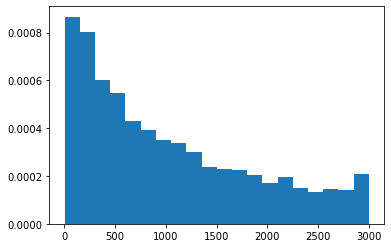

In [48]:
count_wt_ac, bins, else_ = plt.hist(list_activities, bins = 20, density = True)
bins_wt_ac = [(bins[k] + bins[k+1])/2 for k in range(len(bins)-1)]

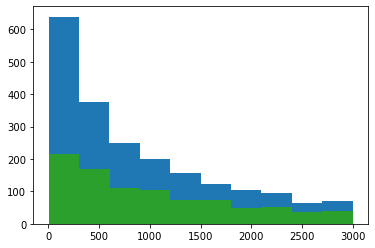

In [49]:
degree= [k[0] for k in degree_activity_filtered]
activity = [k[1] for k in degree_activity_filtered]
filter_degree = [(d >= 100)&(d < 400) for d in degree]
activity_filtered_ = [activity[i] for i in range(len(activity)) if filter_degree[i]]
count_filtered_activity_1, bins_filtered_activity, other = plt.hist(activity_filtered_, bins = 10)
bins_filtered_activity_1 = [(bins_filtered_activity[k] + bins_filtered_activity[k+1])/2 for k in range(len(bins_filtered_activity)-1)]


degree= [k[0] for k in degree_activity_filtered]
activity = [k[1] for k in degree_activity_filtered]
filter_degree = [(d >= 1000)&(d < 1300) for d in degree]
activity_filtered_ = [activity[i] for i in range(len(activity)) if filter_degree[i]]
count_filtered_activity_2, bins_filtered_activity, other = plt.hist(activity_filtered_, bins = 10)
bins_filtered_activity_2 = [(bins_filtered_activity[k] + bins_filtered_activity[k+1])/2 for k in range(len(bins_filtered_activity)-1)]

degree= [k[0] for k in degree_activity_filtered]
activity = [k[1] for k in degree_activity_filtered]
filter_degree = [(d >= 500)&(d < 800) for d in degree]
activity_filtered_ = [activity[i] for i in range(len(activity)) if filter_degree[i]]
count_filtered_activity_3, bins_filtered_activity, other = plt.hist(activity_filtered_, bins = 10)
bins_filtered_activity_3 = [(bins_filtered_activity[k] + bins_filtered_activity[k+1])/2 for k in range(len(bins_filtered_activity)-1)]

### Betas

In [50]:
with open(path_results+'/plot_distribution_beta_GJ.pickle', 'rb') as handle:
    [degree_, beta] = pickle.load(handle)
    
degree_beta = [(d, b) for d, b in zip(degree_, beta)]
list_beta = [k[1] for k in degree_beta]

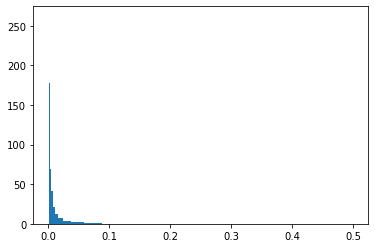

In [51]:
logbins = np.logspace(np.log10(min([k[1] for k in degree_beta])),np.log10(max([k[1] for k in degree_beta])),len(bins))
count_beta, bins, else_ = plt.hist(list_beta, bins = logbins, density = True)
bins_beta = [math.sqrt(bins[k]*bins[k+1]) for k in range(len(bins)-1)]

In [26]:
degree= [k[0] for k in degree_beta]
beta = [k[1] for k in degree_beta]
filter_degree = [(d >= 100)&(d < 400) for d in degree]
beta_filtered_ = [beta[i] for i in range(len(beta)) if filter_degree[i]]

logbins = np.logspace(np.log10(min(beta_filtered_)),np.log10(max(beta_filtered_)),20)

count_filtered_beta_1, bins_filtered_beta = np.histogram(beta_filtered_,  bins = logbins)
bins_filtered_beta_1 = [(bins_filtered_beta[k] + bins_filtered_beta[k+1])/2 for k in range(len(bins_filtered_beta)-1)]

count_filtered_beta_1 = count_filtered_beta_1 / sum(count_filtered_beta_1)

In [27]:
degree= [k[0] for k in degree_beta]
beta = [k[1] for k in degree_beta]
filter_degree = [(d >= 500)&(d < 800) for d in degree]
beta_filtered_ = [beta[i] for i in range(len(beta)) if filter_degree[i]]

logbins = np.logspace(np.log10(min(beta_filtered_)),np.log10(max(beta_filtered_)),20)

count_filtered_beta_2, bins_filtered_beta = np.histogram(beta_filtered_,  bins = logbins) #/ sum(count_filtered_beta_2) # density = True,
bins_filtered_beta_2 = [(bins_filtered_beta[k] + bins_filtered_beta[k+1])/2 for k in range(len(bins_filtered_beta)-1)]

count_filtered_beta_2 = count_filtered_beta_2 / sum(count_filtered_beta_2)

In [28]:
degree= [k[0] for k in degree_beta]
beta = [k[1] for k in degree_beta]
filter_degree = [(d >= 1000)&(d < 1300) for d in degree]
beta_filtered_ = [beta[i] for i in range(len(beta)) if filter_degree[i]]

logbins = np.logspace(np.log10(min(beta_filtered_)),np.log10(max(beta_filtered_)),13)

count_filtered_beta_3, bins_filtered_beta = np.histogram(beta_filtered_,  bins = logbins) # / sum(count_filtered_beta_3) # density = True,
bins_filtered_beta_3 = [(bins_filtered_beta[k] + bins_filtered_beta[k+1])/2 for k in range(len(bins_filtered_beta)-1)]

count_filtered_beta_3 = count_filtered_beta_3 / sum(count_filtered_beta_3)

### Phis

In [52]:
with open(path_results+'/degree_phi_correlation.pickle', 'rb') as handle:
    degree_phi = pickle.load(handle)
    
phi = [k[1] for k in degree_phi]

In [53]:
with open(path_results+'/plot_distribution_phi_GJ.pickle', 'rb') as handle:
    list_prop_inf_nei = pickle.load(handle)

### Waiting times GiletsJaunes

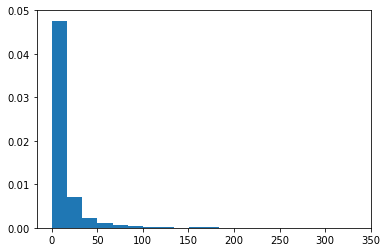

In [57]:
with open(path_results+'/waiting_time_ilets_Jaunes.pickle', 'wb') as handle:
    pickle.dump(waiting_times_GJ, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
count_wt_GJ, bins, else_ = plt.hist(waiting_times_GJ, bins = 20, density = True)
bins_wt_GJ = [(bins[k] + bins[k+1])/2 for k in range(len(bins)-1)]

### Waiting time Experiment 4

In [58]:
with open(path_results+'/waiting_time_AD_from_GJ.pickle', 'rb') as handle:
    waiting_times_AD = pickle.load(handle)

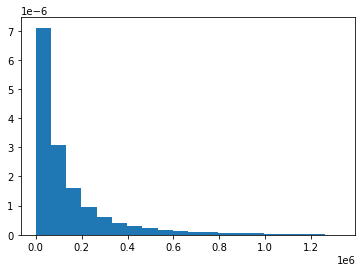

In [59]:
count_wt_AD, bins, else_ = plt.hist(waiting_times_AD, bins = 20, density = True)
bins_wt_AD = [(bins[k] + bins[k+1])/2 for k in range(len(bins)-1)]

### Classification

In [60]:
sample_size = 100000
nber_iterations = 10

In [66]:
for percentage in [40, 60, 80, 100]:

    with open(path_results+'/plot_score_beta_ad_percentage_'+str(percentage)+'_sample_size_'+str(sample_size)+'_nber_iterations_'+str(nber_iterations)+'_bootstrap_lognormal_distribution.pickle', 'rb') as handle:
        L_score_beta = pickle.load(handle)

    with open(path_results+'/plot_score_phi_ad_percentage_'+str(percentage)+'_sample_size_'+str(sample_size)+'_nber_iterations_'+str(nber_iterations)+'_bootstrap_lognormal_distribution.pickle', 'rb') as handle:
        L_score_phi = pickle.load(handle)

    with open(path_results+'/plot_score_r_ad_percentage_'+str(percentage)+'_sample_size_'+str(sample_size)+'_nber_iterations_'+str(nber_iterations)+'_bootstrap_lognormal_distribution.pickle', 'rb') as handle:
        L_score_r = pickle.load(handle)

    with open(path_results+'/bins_beta_plot_ad_percentage_'+str(percentage)+'_sample_size_'+str(sample_size)+'_nber_iterations_'+str(nber_iterations)+'_bootstrap_lognormal_distribution.pickle', 'rb') as handle:
        bins_beta_plot = pickle.load(handle)

    with open(path_results+'/bins_phi_plot_ad_percentage_'+str(percentage)+'_sample_size_'+str(sample_size)+'_nber_iterations_'+str(nber_iterations)+'_bootstrap_lognormal_distribution.pickle', 'rb') as handle:
        bins_phi_plot = pickle.load(handle)

    exec('L_score_beta_'+str(percentage)+' = L_score_beta')
    exec('L_score_phi_'+str(percentage)+' = L_score_phi')
    exec('L_score_r_'+str(percentage)+' = L_score_r')
    exec('bins_beta_plot_'+str(percentage)+' = bins_beta_plot')
    exec('bins_phi_plot_'+str(percentage)+' = bins_phi_plot')
    

# B-Functions for the plot

In [67]:
def reduce_number_of_points(x,y,bins,stat='mean'):
    bin_stats, bin_edges, binnumber = stats.binned_statistic(x, y, statistic=stat, bins=bins)
    bin_std, bin_edges, binnumber = stats.binned_statistic(x, y, statistic='std', bins=bins)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
    return bin_centers, bin_stats, bin_std

# objective function
def objective(x, a, b):
    return a * x + b

def fonction( x, a, b):
    return a * np.exp(-b * x)

def reduce_number_of_points_iac(x, y, bins):
    bin_means, bin_edges, binnumber = stats.binned_statistic(x, y, statistic='mean', bins=bins)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
    return bin_centers, bin_means

# C-Figure 4

In [68]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='black' #'#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='black' #'#333F4B'
plt.rcParams['ytick.color']='black' #'#333F4B'
plt.rcParams['font.size'] = 30

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


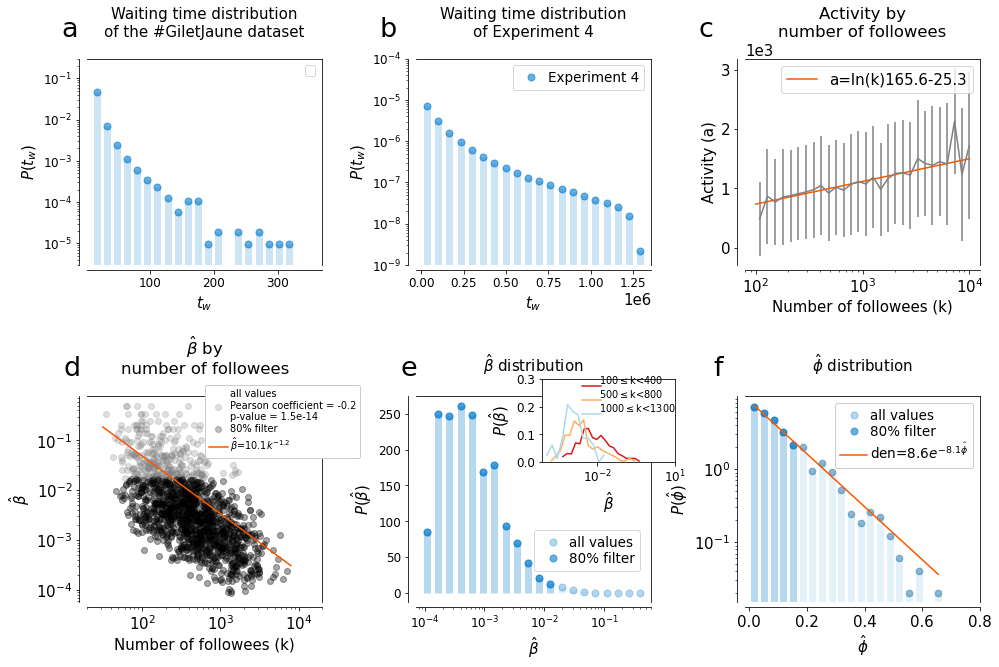

In [69]:
# creating grid for subplots
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(16)
fig.patch.set_facecolor('white')

f = 15

color_wt = '#007acc'
color_scatter = 'grey'   #'#d8b365'
color_fit = '#F95700FF'
 
#################################
###### WAITING TIME 1 ###########
#################################
#ax1 = plt.subplot2grid(shape=(4, 3), loc=(0, 1), rowspan=2)
ax1 = plt.subplot2grid(shape=(4, 3), loc=(0, 1), rowspan=2)

ax1.vlines(x=bins_wt_AD, ymin=0, ymax=[k for k in count_wt_AD], color=color_wt, alpha=0.2, linewidth=7)
ax1.plot(bins_wt_AD, [k for k in count_wt_AD], "o", markersize=7, color=color_wt, alpha=0.6, label = 'Experiment 4')
ax1.set_ylabel(r'$P(t_w)$', fontsize=f, color = 'black')
ax1.xaxis.get_offset_text().set_fontsize(f)
ax1.set_yscale('log')
ax1.tick_params(axis='both', which='major', labelsize=f*0.8)
ax1.spines['left'].set_position(('outward', 8))
ax1.spines['bottom'].set_position(('outward', 5))

ax1.set_ylim(0.000000001, 0.0001)

ax1.annotate(
'Waiting time distribution\nof Experiment 4\n',
xy=(0.5, 1),
xytext=(0, 5),
xycoords="axes fraction",
textcoords="offset points",
ha="center",
va="baseline",
fontsize = f)

#################################
###### WAITING TIME 2 ###########
#################################


ax2 = plt.subplot2grid(shape=(4, 3), loc=(0, 0), rowspan=2)

bins_wt_GJ_, count_wt_GJ_ = reduce_number_of_points_iac(bins_wt_GJ, count_wt_GJ, 20)
ax2.vlines(x=bins_wt_GJ_, ymin=0, ymax=[k for k in count_wt_GJ_], color=color_wt, alpha=0.2, linewidth=7)
ax2.plot(bins_wt_GJ_, [k for k in count_wt_GJ_], "o", markersize=7, color=color_wt, alpha=0.6) # , label = '#GiletJaune dataset'
ax1.set_xlabel(r'$t_w$', fontsize=f, color = 'black') # fontweight='black'
ax2.set_xlabel(r'$t_w$', fontsize=f, color = 'black')
ax2.set_ylabel(r'$P(t_w)$', fontsize=f, color = 'black')
ax2.set_yscale('log')
ax2.tick_params(axis='both', which='major', labelsize=f*0.8)
ax2.spines['left'].set_position(('outward', 8))
ax2.spines['bottom'].set_position(('outward', 5))
ax2.set_ylim(0.000003, 0.3)


ax2.annotate(
'Waiting time distribution\nof the #GiletJaune dataset\n',
xy=(0.5, 1),
xytext=(0, 5),
xycoords="axes fraction",
textcoords="offset points",
ha="center",
va="baseline",
fontsize = f)

#################################
###### beta versus degree ###########
#################################
ax3 = plt.subplot2grid(shape=(4, 3), loc=(2, 0), rowspan=2)

degree = [k[0] for k in degree_beta]
beta = [k[1] for k in degree_beta]

corr_coeff, p_value = pearsonr(degree, beta)
p_value = '1.5e-14'

xy = np.vstack([degree,beta])
z = gaussian_kde(xy)(xy)
density = ax3.scatter(degree, beta, alpha = 0.25, color= color_scatter, label = 'all values\nPearson coefficient = '+str(round(corr_coeff,2))+'\np-value = '+p_value) # , label = 'Real data'
ax3.set_xlabel('Number of followees (k)', fontsize = f)
ax3.set_ylabel(r'$\hat{\beta}$', fontsize = f)
ax3.tick_params(axis='x', labelsize=f)
ax3.tick_params(axis='y', labelsize=f)
for index_percentage, percentage in enumerate([80]):
    max_beta = np.percentile(beta, percentage)
filter_ = [beta_<max_beta for beta_ in beta]
beta_filtered = [degree[i] for i in range(len(degree)) if filter_[i]]
degree_filtered = [beta[i] for i in range(len(beta)) if filter_[i]]
ax3.scatter(beta_filtered, degree_filtered, alpha = 0.25, color= 'black', label = '80% filter') # , label = 'Real data'
nber_bins = 30
list_bins = np.logspace(1.5,3.9,nber_bins)
list_avg_beta = []
list_std_beta = []
for k in range(nber_bins-1):
    min_bin = list_bins[k]
    max_bin = list_bins[k+1]
    beta_local = [k[1] for k in degree_beta if ((k[0] >= min_bin) & (k[0] < max_bin))]
    avg_beta_local = np.mean(beta_local)
    std_beta_local = np.std(beta_local)
    list_avg_beta.append(avg_beta_local)
    list_std_beta.append(std_beta_local)
list_bins_plot = [(b1 + b2)/2 for b1, b2 in zip(list_bins[1:],list_bins[:-1])]    
a = np.polyfit([math.log(k) for k in list_bins_plot], [math.log(k) for k in list_avg_beta], 1)
degree_fit = np.logspace(1.5,3.9,nber_bins)
beta_fit = [math.exp(a[1])*x**a[0] for x in degree_fit]
ax3.plot(degree_fit, beta_fit, color = color_fit, label = r'$\hat{\beta}$'+'='+str(round(math.exp(a[1]),1))+r'$k^{-1.2}$') # +str(round(a[0],1))   
b_mean = a[1]
a_mean = a[0]
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim((20, 20000))
ax3.spines['left'].set_position(('outward', 8))
ax3.spines['bottom'].set_position(('outward', 5))

ax3.annotate(
r'$\hat{\beta}$'+' by\nnumber of followees\n',
xy=(0.5, 1),
xytext=(0, 5),
xycoords="axes fraction",
textcoords="offset points",
ha="center",
va="baseline",
fontsize = f*1.1)

#################################
###### activity vs k ###########
#################################
ax5 = plt.subplot2grid(shape=(4, 3), loc=(0, 2), rowspan=2)

degree = [k[0] for k in degree_activity_filtered]
activity = [k[1] for k in degree_activity_filtered]                       
bin_centers, bin_stats, bin_std = reduce_number_of_points(degree,activity,np.logspace(2,4,30),stat='mean')            
ax5.errorbar(bin_centers, bin_stats, yerr = bin_std, color = color_scatter) # , label = 'Real data'
ax5.set_xscale('log')
ax5.set_xlabel('Number of followees (k)', fontsize = f)
ax5.set_ylabel('Activity (a)', fontsize = f)
popt, _ = curve_fit(objective, [math.log(k) for k in degree[:]], activity)
a_mean, b_mean = popt
X = [k for k in range(100, 10000)]
Y = [math.log(x)*a_mean + b_mean for x in X]
ax5.plot(X, Y, label = 'a=ln(k)'+str(round(a_mean,1))+''+str(round(b_mean,1)), color = color_fit)
ax5.set_xscale('log')
ax5.legend(fontsize = f)
ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax5.tick_params(axis='x', labelsize=f)
ax5.tick_params(axis='y', labelsize=f)
handles, labels = ax5.get_legend_handles_labels()
ax5.yaxis.get_offset_text().set_fontsize(f)

ax5.annotate(
'Activity by\nnumber of followees\n',
xy=(0.5, 1),
xytext=(0, 5),
xycoords="axes fraction",
textcoords="offset points",
ha="center",
va="baseline",
fontsize = f*1.1)

ax5.spines['left'].set_position(('outward', 8))
ax5.spines['bottom'].set_position(('outward', 5))

#################################
###### phi ###########
################################# 

ax7 = plt.subplot2grid(shape=(4, 3), loc=(2, 2), rowspan=2)

density, bins = np.histogram([k for k in list_prop_inf_nei], bins=20, density=True)
unity_density = density
center = (bins[:-1] + bins[1:]) / 2

ax7.scatter(center, [k for k in unity_density], marker='o', color = color_scatter, alpha = 0.35)

ax7.vlines(x=center, ymin=0, ymax=[k for k in unity_density], color=color_wt, alpha=0.1, linewidth=7)
ax7.plot(center, [k for k in unity_density], "o", markersize=7, color=color_wt, alpha=0.3, label = 'all values')

for index_percentage, percentage in enumerate([80]):
    max_prop = np.percentile(phi, percentage)
filter_ =  [p<max_prop for p in center]
center_filtered = [center[i] for i in range(len(center)) if filter_[i]]
unity_density_filtered = [unity_density[i] for i in range(len(unity_density)) if filter_[i]]
ax7.vlines(x=center_filtered, ymin=0, ymax=unity_density_filtered, color=color_wt, alpha=0.2, linewidth=7)
ax7.plot(center_filtered, unity_density_filtered, "o", markersize=7, color=color_wt, alpha=0.6, label = '80% filter')


ax7.set_xlabel(r'$\hat{\phi}$', fontsize=f, color = 'black')
ax7.set_ylabel(r'$P(\hat{\phi})$', fontsize=f, color = 'black')
ax7.set_yscale('log')
ax7.tick_params(axis='both', which='major', labelsize=f*0.8)
ax7.spines['left'].set_position(('outward', 8))
ax7.spines['bottom'].set_position(('outward', 5))
params, covar = curve_fit(fonction, center, unity_density)
ax7.plot(center, [params[0] * np.exp(-params[1] * x) for x in center], label = 'den='+str(round(params[0], 1))+r'$e^{-8.1\hat{\phi}}$', color= color_fit)  # +str(round(-params[1], 1))+r'$\hat{\phi}$)'
ax7.set_xlabel(r'$\hat{\phi}$', fontsize = f)
ax7.set_ylabel(r'$P(\hat{\phi})$', fontsize = f)
ax7.tick_params(axis='x', labelsize=f)
ax7.tick_params(axis='y', labelsize=f)

ax7.annotate(
r'$\hat{\phi}$'+' distribution\n',
xy=(0.5, 1),
xytext=(0, 5),
xycoords="axes fraction",
textcoords="offset points",
ha="center",
va="baseline",
fontsize = f)

###############################
###############################

plt.subplots_adjust(wspace=0.4, 
                    hspace=3.5)

left, bottom, width, height = ax2.get_position().bounds
ax1.legend(fontsize = f*0.9, columnspacing=0.5, handletextpad=0.2, labelspacing=0.2)
ax2.set_xlim(right=370)
ax2.legend(fontsize = f*0.9, columnspacing=0.5, handletextpad=0.2
ax3.legend(fontsize = f*0.65, loc = (0.5, 0.7), facecolor='white', framealpha=1, columnspacing=0.5, handletextpad=0.2, labelspacing=0.2)


ax7.set_xlim(right=0.8)
ax7.legend(fontsize = f*0.9, loc = 'upper right', facecolor='white', framealpha=1, columnspacing=0.5, handletextpad=0.2, labelspacing=0.2, frameon=True)

ax2.text(-40, 1, 'a', fontsize = f*1.8)
ax2.text(460, 1, 'b', fontsize = f*1.8)
ax2.text(960, 1, 'c', fontsize = f*1.8)


#################################
###### beta ###########
#################################

ax4 = plt.subplot2grid(shape=(4, 3), loc=(2, 1), rowspan=2)

ax4.vlines(x=bins_beta, ymin=0, ymax=count_beta, color=color_wt, alpha=0.1, linewidth=7)
ax4.plot(bins_beta, count_beta, "o", markersize=7, color=color_wt, alpha=0.3, label = 'all values')
  
filter_ =  [b<max_beta for b in bins_beta]
bins_filtered_beta_f = [bins_beta[i] for i in range(len(bins_beta)) if filter_[i]]
count_filtered_beta_f = [count_beta[i] for i in range(len(count_beta)) if filter_[i]]
ax4.vlines(x=bins_filtered_beta_f, ymin=0, ymax=[k for k in count_filtered_beta_f], color=color_wt, alpha=0.2, linewidth=7)
ax4.plot(bins_filtered_beta_f, [k for k in count_filtered_beta_f], "o", markersize=7, color=color_wt, alpha=0.6, label = '80% filter')

ax4.set_xlabel(r'$\hat{\beta}$', fontsize=f, color = 'black') 
ax4.set_ylabel(r'$P(\hat{\beta})$', fontsize=f, color = 'black')
ax4.xaxis.get_offset_text().set_fontsize(f)
ax4.tick_params(axis='both', which='major', labelsize=f*0.8)
ax4.spines['left'].set_position(('outward', 8))
ax4.spines['bottom'].set_position(('outward', 5))
ax4.spines['left'].set_position(('outward', 8))
ax4.spines['bottom'].set_position(('outward', 5))

ax4.set_xscale('log')
           
ax4.annotate(
r'$\hat{\beta}$'+' distribution\n',
xy=(0.5, 1),
xytext=(0, 5),
xycoords="axes fraction",
textcoords="offset points",
ha="center",
va="baseline",
fontsize = f)

ax4.legend(fontsize = f*0.9, columnspacing=0.5, handletextpad=0.2, labelspacing=0.2, loc = (0.5, 0.15))

# Define the position and size of the inner plot within the outer plot
left, bottom, width, height = 0.52, 0.32, 0.115, 0.115
ax_inner = fig.add_axes([left, bottom, width, height])
ax_inner.tick_params(axis='both', which='major', labelsize=f*0.8)
l_color = ['#d7191c','#fdae61','#abd9e9','#2c7bb6']
           
# Plot something on the inner plot
ax_inner.plot(bins_filtered_beta_1, [k for k in count_filtered_beta_1], label = '100'+r'$\leq$'+'k<400\n', color = l_color[0])
ax_inner.plot(bins_filtered_beta_2, [k for k in count_filtered_beta_2], label = '500'+r'$\leq$'+'k<800\n', color = l_color[1])
ax_inner.plot(bins_filtered_beta_3, [k for k in count_filtered_beta_3], label = '1000'+r'$\leq$'+'k<1300\n', color = l_color[2])
ax_inner.legend(fontsize = f*0.65, labelspacing=-1, frameon=False, handletextpad=-0.2, loc = (0.27, 0.4)) # 
ax_inner.set_ylabel(r'$P(\hat{\beta})$', fontsize = f)
ax_inner.set_xlabel(r'$\hat{\beta}$', fontsize = f)
ax_inner.set_xscale('log')
ax_inner.set_facecolor('white')

ax_inner.set_ylim((0, 0.3))
ax_inner.set_xlim(right = 10)

ax3.text(10, 2, 'd', fontsize = f*1.8)
ax3.text(200000, 2, 'e', fontsize = f*1.8)
ax3.text(2000000000, 2, 'f', fontsize = f*1.8)


plt.savefig('figure4.pdf',bbox_inches='tight',transparent=False)


# Figure S6

PERCENTAGE 40
PERCENTAGE 60
PERCENTAGE 80
PERCENTAGE 100


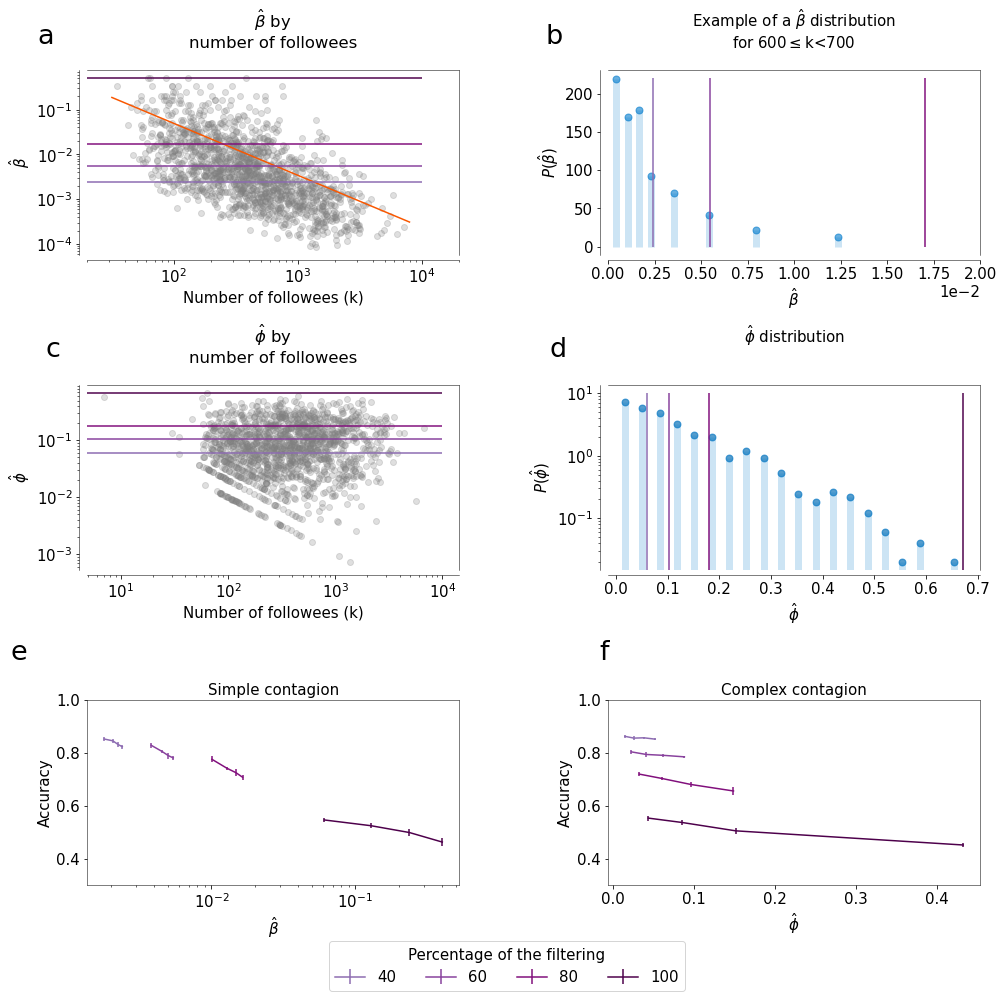

In [83]:
# creating grid for subplots
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(16)

f = 15

colors_percentage = ['#74a9cf','#3690c0','#0570b0','#045a8d','#023858']

colors_percentage = ['#8c6bb1','#88419d','#810f7c','#4d004b']
 
#################################
###### beta number followees ###########
#################################
ax1 = plt.subplot2grid(shape=(3, 2), loc=(0, 0), colspan=1)

degree = [k[0] for k in degree_beta]
beta = [k[1] for k in degree_beta]
xy = np.vstack([degree,beta])
z = gaussian_kde(xy)(xy)
density = ax1.scatter(degree, beta, alpha = 0.25, color= color_scatter, label = 'all values') # , label = 'Real data'
ax1.set_xlabel('Number of followees (k)', fontsize = f)
ax1.set_ylabel(r'$\hat{\beta}$', fontsize = f)
ax1.tick_params(axis='x', labelsize=f)
ax1.tick_params(axis='y', labelsize=f)
nber_bins = 30
list_bins = np.logspace(1.5,3.9,nber_bins)
list_avg_beta = []
list_std_beta = []
for k in range(nber_bins-1):
    min_bin = list_bins[k]
    max_bin = list_bins[k+1]
    beta_local = [k[1] for k in degree_beta if ((k[0] >= min_bin) & (k[0] < max_bin))]
    avg_beta_local = np.mean(beta_local)
    std_beta_local = np.std(beta_local)
    list_avg_beta.append(avg_beta_local)
    list_std_beta.append(std_beta_local)
list_bins_plot = [(b1 + b2)/2 for b1, b2 in zip(list_bins[1:],list_bins[:-1])]    
a = np.polyfit([math.log(k) for k in list_bins_plot], [math.log(k) for k in list_avg_beta], 1)
degree_fit = np.logspace(1.5,3.9,nber_bins)
beta_fit = [math.exp(a[1])*x**a[0] for x in degree_fit]
ax1.plot(degree_fit, beta_fit, color = color_fit, label = r'$\hat{\beta}$'+'='+str(round(math.exp(a[1]),1))+r'$k^{-1.2}$') # +str(round(a[0],1))   
b_mean = a[1]
a_mean = a[0]
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim((20, 20000))
ax1.spines['left'].set_position(('outward', 8))
ax1.spines['bottom'].set_position(('outward', 5))

for index_percentage, percentage in enumerate([40, 60, 80, 100]):
    max_prop = np.percentile(beta, percentage)
    ax1.hlines(max_prop, 0, 10000, color = colors_percentage[index_percentage], ls = 'solid')


ax1.annotate(
r'$\hat{\beta}$'+' by\nnumber of followees\n',
xy=(0.5, 1),
xytext=(0, 5),
xycoords="axes fraction",
textcoords="offset points",
ha="center",
va="baseline",
fontsize = f*1.1)

#################################
###### beta  ###########
#################################
ax2 = plt.subplot2grid(shape=(3, 2), loc=(0, 1), colspan=1)

bins_filtered_beta_, count_filtered_beta_ = reduce_number_of_points_iac(bins_filtered_beta_f, count_filtered_beta_f, 20)

ax2.vlines(x=bins_filtered_beta_, ymin=0, ymax=count_filtered_beta_, color=color_wt, alpha=0.2, linewidth=7)
ax2.plot(bins_filtered_beta_, count_filtered_beta_, "o", markersize=7, color=color_wt, alpha=0.6, label = 'all values')
  
degree= [k[0] for k in degree_beta]
beta = [k[1] for k in degree_beta]
filter_degree = [(d >= 600)&(d < 700) for d in degree]
beta_filtered_ = [beta[i] for i in range(len(beta)) if filter_degree[i]]

for index_percentage, percentage in enumerate([40, 60, 80, 100]):
    max_prop = np.percentile(beta, percentage)
    ax2.vlines(max_prop, 0, 220, color = colors_percentage[index_percentage], ls = 'solid', label = str(percentage))

ax2.set_xlabel(r'$\hat{\beta}$', fontsize=f, color = 'black') # fontweight='black'
ax2.set_ylabel(r'$P(\hat{\beta})$', fontsize=f, color = 'black')
ax2.xaxis.get_offset_text().set_fontsize(f)
ax2.tick_params(axis='both', which='major', labelsize=f*0.8)
ax2.spines['left'].set_position(('outward', 8))
ax2.spines['bottom'].set_position(('outward', 5))
ax2.set_xlim((0, 0.02))
ax2.spines['left'].set_position(('outward', 8))
ax2.spines['bottom'].set_position(('outward', 5))

ax2.annotate(
'Example of a '+r'$\hat{\beta}$'+' distribution\nfor 600'+r'$\leq$'+'k<700\n',
xy=(0.5, 1),
xytext=(0, 5),
xycoords="axes fraction",
textcoords="offset points",
ha="center",
va="baseline",
fontsize = f)

ax2.tick_params(axis='x', labelsize=f)
ax2.tick_params(axis='y', labelsize=f)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.xaxis.get_offset_text().set_fontsize(f)


#################################
###### phi number followees ###########
#################################
ax3 = plt.subplot2grid(shape=(3, 2), loc=(1, 0), colspan=1)

degree = [k[0] for k in degree_phi]
phi = [k[1] for k in degree_phi]
xy = np.vstack([degree,phi])
z = gaussian_kde(xy)(xy)
density = ax3.scatter(degree, phi, alpha = 0.25, color= color_scatter, label = 'all values') # , label = 'Real data'
ax3.set_xlabel('Number of followees (k)', fontsize = f)
ax3.set_ylabel(r'$\hat{\phi}$', fontsize = f)
ax3.tick_params(axis='x', labelsize=f)
ax3.tick_params(axis='y', labelsize=f)

for index_percentage, percentage in enumerate([40, 60, 80, 100]):
    max_prop = np.percentile(list_prop_inf_nei, percentage)
    ax3.hlines(max_prop, 0, 10000, color = colors_percentage[index_percentage], ls = 'solid', label = str(percentage))

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.annotate(
r'$\hat{\phi}$'+' by\nnumber of followees\n',
xy=(0.5, 1),
xytext=(0, 5),
xycoords="axes fraction",
textcoords="offset points",
ha="center",
va="baseline",
fontsize = f*1.1)

ax3.spines['left'].set_position(('outward', 8))
ax3.spines['bottom'].set_position(('outward', 5))


#################################
###### phi  ###########
#################################
ax4 = plt.subplot2grid(shape=(3, 2), loc=(1, 1), colspan=1)

density, bins = np.histogram([k for k in list_prop_inf_nei], bins=20, density=True) #  if k!=0 # np.logspace(-4,0,30)
unity_density = density #/ density.sum()
center = (bins[:-1] + bins[1:]) / 2
ax4.scatter(center, unity_density, marker='o', color = color_scatter, alpha = 0.35) # label = 'Real data',

ax4.vlines(x=center, ymin=0, ymax=unity_density, color=color_wt, alpha=0.2, linewidth=7)
ax4.plot(center, unity_density, "o", markersize=7, color=color_wt, alpha=0.6, label = 'all values')

for index_percentage, percentage in enumerate([40, 60, 80, 100]):
    max_prop = np.percentile(list_prop_inf_nei, percentage)
    ax4.vlines(max_prop, 0, 10, color = colors_percentage[index_percentage], ls = 'solid', label = str(percentage))

#for index_percentage, percentage in enumerate([80]):
#    max_prop = np.percentile(phi, percentage)
#filter_ =  [p<max_prop for p in center]
#center_filtered = [center[i] for i in range(len(center)) if filter_[i]]
#unity_density_filtered = [unity_density[i] for i in range(len(unity_density)) if filter_[i]]
#ax7.vlines(x=center_filtered, ymin=0, ymax=unity_density_filtered, color=color_wt, alpha=0.2, linewidth=7)
#ax7.plot(center_filtered, unity_density_filtered, "o", markersize=7, color=color_wt, alpha=0.6, label = '80% filter')


ax4.set_xlabel(r'$\hat{\phi}$', fontsize=f, color = 'black') # fontweight='black'
ax4.set_ylabel('Frequency', fontsize=f, color = 'black')
##4x2.set_xlim((-2, 199))
ax4.set_yscale('log')
ax4.tick_params(axis='both', which='major', labelsize=f*0.8)
#a47.spines['top'].set_visible(False)
#a47.spines['right'].set_visible(False)
ax4.spines['left'].set_position(('outward', 8))
ax4.spines['bottom'].set_position(('outward', 5))
pa4ams, covar = curve_fit(fonction, center, unity_density)
#ax4.plot(center, [params[0] * np.exp(-params[1] * x) for x in center], label = 'den='+str(round(params[0], 1))+r'$e^{-8.1\hat{\phi}}$', color= color_fit)  # +str(round(-params[1], 1))+r'$\hat{\phi}$)'
ax4.set_xlabel(r'$\hat{\phi}$', fontsize = f)
ax4.set_ylabel(r'$P(\hat{\phi})$', fontsize = f)
ax4.tick_params(axis='x', labelsize=f)
ax4.tick_params(axis='y', labelsize=f)

ax4.annotate(
r'$\hat{\phi}$'+' distribution\n\n',
xy=(0.5, 1),
xytext=(0, 5),
xycoords="axes fraction",
textcoords="offset points",
ha="center",
va="baseline",
fontsize = f)

#################################
###### classification beta  ###########
#################################
ax5 = plt.subplot2grid(shape=(3, 2), loc=(2, 0), colspan=1)

#################################
###### classification phi  ###########
#################################
ax6 = plt.subplot2grid(shape=(3, 2), loc=(2, 1), colspan=1)


for index_percentage, percentage in enumerate([40, 60, 80, 100]):
    
    print('PERCENTAGE', percentage)
    
    exec('L_score_beta = L_score_beta_'+str(percentage))
    exec('L_score_phi = L_score_phi_'+str(percentage))
    exec('L_score_r = L_score_r_'+str(percentage))
    exec('bins_beta_plot = bins_beta_plot_'+str(percentage))
    exec('bins_phi_plot = bins_phi_plot_'+str(percentage))

    L_score_beta_mean = [np.mean(k) for k in L_score_beta]
    L_score_beta_std = [np.std(k) for k in L_score_beta]

    L_score_phi_mean = [np.mean(k) for k in L_score_phi]
    L_score_phi_std = [np.std(k) for k in L_score_phi]

    ax5.errorbar(bins_beta_plot, L_score_beta_mean, yerr=L_score_beta_std, label = str(percentage), color = colors_percentage[index_percentage])
    ax6.errorbar([k for k in bins_phi_plot], L_score_phi_mean, yerr=L_score_phi_std, label = str(percentage), color = colors_percentage[index_percentage])

    ax5.set_xlabel(r'$\hat{\beta}$', fontsize = f)
    ax6.set_xlabel(r'$\hat{\phi}$', fontsize = f)
    
    ax5.set_ylabel('Accuracy', fontsize = f)
    ax6.set_ylabel('Accuracy', fontsize = f)
    
    ax5.tick_params(axis='x', labelsize=f)
    ax5.tick_params(axis='y', labelsize=f)
    ax6.tick_params(axis='x', labelsize=f)
    ax6.tick_params(axis='y', labelsize=f)
    ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax6.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax5.set_ylim((0.3, 1))
    ax6.set_ylim((0.3, 1))  

ax5.set_xscale('log')
#ax4.legend(title = "Percentage of the filtering", fontsize = f, loc = (-0.1, -0.92), ncol = 4, title_fontsize = f)
ax6.legend(title = "Percentage of the filtering", fontsize = f, loc = (-0.75, -0.57), ncol = 4, title_fontsize = f)

ax5.annotate(
'Simple contagion',
xy=(0.5, 1),
xytext=(0, 5),
xycoords="axes fraction",
textcoords="offset points",
ha="center",
va="baseline",
fontsize = f)

ax6.annotate(
'Complex contagion',
xy=(0.5, 1),
xytext=(0, 5),
xycoords="axes fraction",
textcoords="offset points",
ha="center",
va="baseline",
fontsize = f)

####################################

ax1.text(8, 3, 'a', fontsize = f*1.8)
ax1.text(100000, 3, 'b', fontsize = f*1.8)

ax3.text(2, 3, 'c', fontsize = f*1.8)
ax3.text(100000, 3, 'd', fontsize = f*1.8)

ax5.text(0.0004, 1.15, 'e', fontsize = f*1.8)
ax5.text(5, 1.15, 'f', fontsize = f*1.8)


###################################
###################################
###################################

plt.subplots_adjust(wspace=0.4, 
                    hspace=0.7)

plt.savefig('figureS6.pdf',bbox_inches='tight',transparent=True)


# plot the performances for spontaneous

In [84]:
with open('plot_score_r_ad_percentage_'+str(percentage)+'_sample_size_'+str(sample_size)+'_nber_iterations_'+str(nber_iterations)+'.pickle', 'wb') as handle:
    pickle.dump(L_score_r, handle)

In [85]:
for percentage in [40, 60, 80, 100]:
    
    print('PERCENTAGE', percentage)

    with open('/mnt/sdb1/elsa/ML_6/Optimisation/plot_score_r_ad_percentage_'+str(percentage)+'_sample_size_'+str(sample_size)+'_nber_iterations_'+str(nber_iterations)+'.pickle', 'rb') as handle:
        L_score_r = pickle.load(handle)
        
    print('mean', np.mean(L_score_r))
    print('std', np.std(L_score_r))
    
    print()
        

PERCENTAGE 40
mean 0.06556366496452616
std 0.006020982401839586

PERCENTAGE 60
mean 0.07931802841114007
std 0.005934233671087542

PERCENTAGE 80
mean 0.1649826017529718
std 0.01817758014015196

PERCENTAGE 100
mean 0.5545453068016438
std 0.04161161809465422

